Objetivos:

1. Construir uma tabela com as seguintes informações:
  - País origem (brasil): feito(df_merged)
  - País destino: feito(df_merged)
  - Litros: feito(df_merged)
  - Valor em dólares: feito(df_merged)

2. Dizer o montante de venda de exportação nos últimos 15 anos, separando a análise por país e trazendo quais prospecções futuras e possíveis açõe spara uma boa melhoria nas exportações. Considerar:
  - Dados climáticos
  - Dados demográficos
  - Dados econômicos
  - Dados de avaliação de vinhos

In [ ]:
# importando bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## TRATANDO E PADRONIZANDO BASES

In [ ]:
# --------------- TRATAMENTO DF EXPORTACAO

# Dados
df_export = pd.read_csv('exportacao.csv',sep = ';')

# Separando as colunas de quilogramas e dólares
df_kg = df_export[['País','2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']]
df_usd = df_export[['País','2008.1', '2009.1', '2010.1', '2011.1', '2012.1', '2013.1', '2014.1', '2015.1', '2016.1', '2017.1', '2018.1', '2019.1', '2020.1', '2021.1', '2022.1']]

# Aplicando o melt separadamente para litros (1L = 1kg)
melted_df_kg = pd.melt(df_kg, id_vars=['País'], var_name='ano', value_name='litros')

# Aplicando o melt separadamente para dólares
melted_df_usd = pd.melt(df_usd, id_vars=['País'], var_name='ano', value_name='usd')

# Unindo os dois DataFrames resultantes pelo índice
df_export = pd.concat([melted_df_kg, melted_df_usd['usd']], axis=1)

# Removendo linhas em que usd E litros sejam iguais a zero
df_export = df_export[(df_export['usd'] != 0) & (df_export['litros'] != 0)]

# Renomeando coluna
df_export = df_export.rename(columns={'País':'destino'})

# df_export.head()

In [ ]:
# --------------- TRATAMENTO DF POPULACAO

# Dados
df_pop = pd.read_csv('pop_mundial.csv', sep = ',')

# Pegando somente colunas necessárias
df_pop = df_pop[['country','2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']]

# Aplicando o melt para populacao
df_pop = pd.melt(df_pop, id_vars=['country'], var_name='ano', value_name='populacao')

# Renomeando coluna
df_pop = df_pop.rename(columns={'country':'destino'})

# df_pop.head()

In [ ]:
# --------------- TRATAMENTO DF FINANCAS

# Dados
df_finan = pd.read_csv('financa_mundial.csv',sep = ',',decimal = ',')

# Convertendo tipo de coluna
df_finan['Minimum wage'] = df_finan['Minimum wage'].astype('float64')

# Preenchendo vazios com zero
df_finan = df_finan.fillna(0)

# Renomeando colunas
df_finan = df_finan.rename(columns={'Country':'destino', 'GDP':'pib_usd','Minimum wage':'salario_minimo_usd_hr'})

# df_finan.head()

In [ ]:
# --------------- TRATAMENTO DF IDADE MEDIA

# Dados
df_idade = pd.read_csv('median_age.csv',sep = ',',decimal = ',')

# Renomeando colunas
df_idade = df_idade.rename(columns={'country':'destino', 'Med. Age':'idade_media','Urban Pop':'pop_urbana'})

# df_idade.head()

## CONCATENANDO BASES

In [ ]:
# df1 = df_export + df_pop
df1 = pd.merge(df_export, df_pop, on=['destino','ano'])

# df2 = df1 + df_finan
df2 = pd.merge(df1, df_finan, on=['destino'])

# df3 = df2 + df_idade
df3 = pd.merge(df2, df_idade, on=['destino'])

In [ ]:
# -----------| Alterar aqui caso novos merges sejam feitos
df_merged = df3
df_merged['origem'] = 'Brasil'
ordenando = ['origem','destino', 'ano','litros','usd','populacao','pib_usd','salario_minimo_usd_hr','idade_media','pop_urbana']
df_merged = df_merged[ordenando]

## CÁLCULOS E NOVAS COLUNAS

In [ ]:
df_merged.head()

,origem,destino,ano,litros,usd,populacao,pib_usd,salario_minimo_usd_hr,idade_media,pop_urbana
0,Brasil,Angola,2008,25721,71083,21691522,9.463542e+10,0.71,17.0,0.67
1,Brasil,Angola,2009,54786,84235,22507674,9.463542e+10,0.71,17.0,0.67
2,Brasil,Angola,2010,33557,189891,23364185,9.463542e+10,0.71,17.0,0.67
3,Brasil,Angola,2011,13889,69001,24259111,9.463542e+10,0.71,17.0,0.67
4,Brasil,Angola,2012,2833,8861,25188292,9.463542e+10,0.71,17.0,0.67


In [ ]:
# Dólar por litro
df_merged['preco_litro_usd'] = df_merged['usd'] / df_merged['litros']

# PIB per capita
df_merged['pib_capita_usd'] = df_merged['pib_usd'] / df_merged['populacao']

# Salário médio mês: preço da hora * 220 horas mensais
df_merged['salario_minimo_usd_mes'] = df_merged['salario_minimo_usd_hr'] * 220
df_merged.head()

# Litros por habitante
df_merged['litros_habitante'] = df_merged['litros'] / df_merged['populacao']

<ipython-input-12-6680f182fc9b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['preco_litro_usd'] = df_merged['usd'] / df_merged['litros']
<ipython-input-12-6680f182fc9b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['pib_capita_usd'] = df_merged['pib_usd'] / df_merged['populacao']
<ipython-input-12-6680f182fc9b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [ ]:
df_merged.sort_values(by= 'usd', ascending=False).head()

,origem,destino,ano,litros,usd,populacao,pib_usd,salario_minimo_usd_hr,idade_media,pop_urbana,preco_litro_usd,pib_capita_usd,salario_minimo_usd_mes,litros_habitante
275,Brasil,Rússia,2013,5893291,14795694,143956866,1.699877e+12,0.53,40.0,0.74,2.510600,11808.235523,116.6,0.040938
230,Brasil,Paraguai,2021,6522527,7192362,6703799,3.814529e+10,1.55,26.0,0.62,1.102696,5690.100336,341.0,0.972960
231,Brasil,Paraguai,2022,5076670,7156293,6780744,3.814529e+10,1.55,26.0,0.62,1.409643,5625.531496,341.0,0.748689
273,Brasil,Rússia,2009,21912914,5732280,143163643,1.699877e+12,0.53,40.0,0.74,0.261594,11873.661100,116.6,0.153062
227,Brasil,Paraguai,2018,3234168,5494321,6443328,3.814529e+10,1.55,26.0,0.62,1.698836,5920.122170,341.0,0.501941


## ANÁLISES GRÁFICAS

### Montante total de vendas

In [ ]:
montante_vendas = df_merged['litros'].sum().round(0)
montante_vendas = print('US$', f'{montante_vendas:,.2f}')
montante_vendas

US$ 85,178,533.00


### Top 10 países por total de venda (USD) e litros vendidos

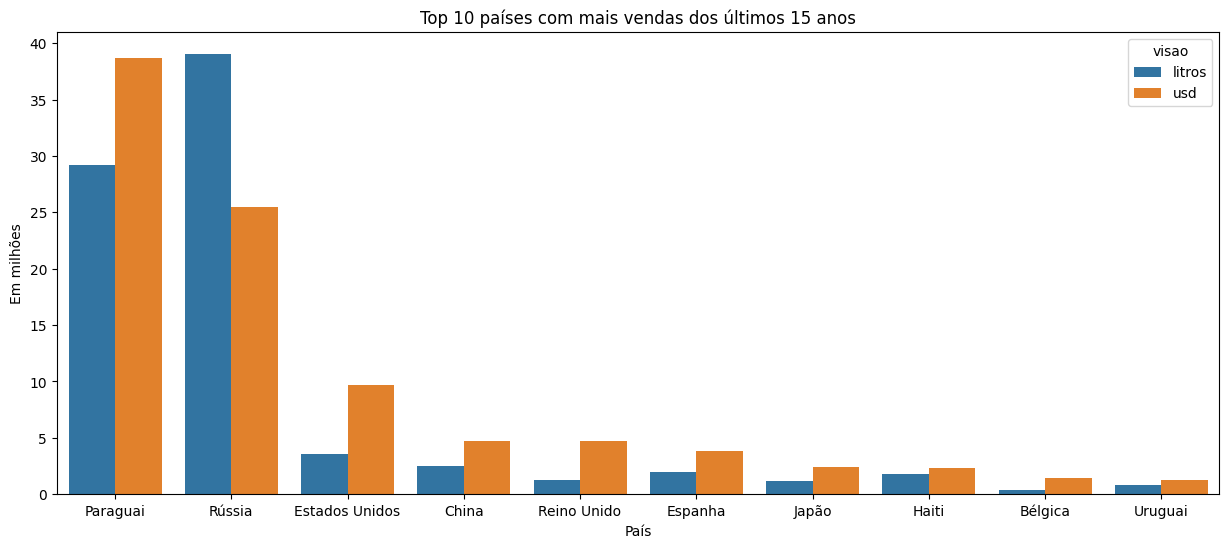

In [ ]:
# montante de vendas em dólares e litros nos últimos 15 anos
df_montante = df_merged[['destino','usd','litros']].groupby('destino').sum().reset_index()
df_montante = df_montante.sort_values(by= 'usd', ascending=False).head(10)
df_montante = pd.melt(df_montante[['destino','litros','usd']],id_vars='destino', var_name='visao', value_name='valor')

# PLOTANDO A INFORMAÇÃO

## melhorando visualização do eixo y
df_montante['valor'] = df_montante['valor'] / 1000000

## tamanho do gráfico
plt.figure(figsize=(15, 6))

## criando gráfico
sns.barplot(df_montante, x = 'destino', y = 'valor', hue='visao')

## ajustes
plt.title('Top 10 países com mais vendas dos últimos 15 anos')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('País')
plt.ylabel('Em milhões')
### adicionando grid
sns.set_style("whitegrid", {'grid.color': '.2'})

plt.show()

### Curva ao longo do tempo

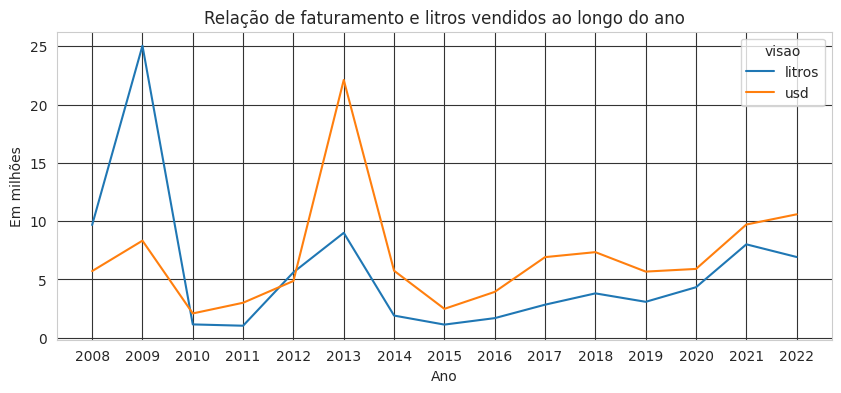

In [ ]:
# Montante de USD e Litros por ano
df_tempo = df_merged[['ano','usd','litros']].groupby(['ano']).sum().reset_index()
#df_tempo['preco_litro_usd'] = df_tempo['usd'] / df_tempo['litros']
#df_tempo = pd.melt(df_tempo[['ano','litros','usd','preco_litro_usd']],id_vars='ano', var_name='visao', value_name='valor')

# PLOTANDO A INFORMAÇÃO

## melhorando visualização do eixo y
df_tempo = pd.melt(df_tempo[['ano','litros','usd']],id_vars='ano', var_name='visao', value_name='valor')
df_tempo['valor'] = df_tempo['valor'] / 1000000

## ajustando tamanho do gráfico
plt.figure(figsize=(10, 4))

## criando gráfico
sns.lineplot(data=df_tempo, x = 'ano', y='valor', hue = 'visao')

## ajustes
plt.title('Relação de faturamento e litros vendidos ao longo do ano')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Ano')
plt.ylabel('Em milhões')
### adicionando grid
sns.set_style("whitegrid", {'grid.color': '.2'})

plt.show()

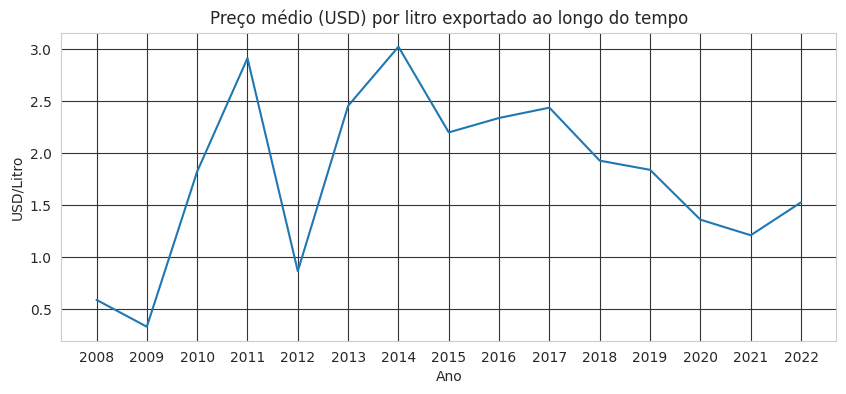

In [ ]:
# Montante de USD e Litros por ano
df_tempo = df_merged[['ano','usd','litros']].groupby(['ano']).sum().reset_index()
df_tempo['preco_litro_usd'] = df_tempo['usd'] / df_tempo['litros']
#df_tempo = pd.melt(df_tempo[['ano','litros','usd','preco_litro_usd']],id_vars='ano', var_name='visao', value_name='valor')

# PLOTANDO A INFORMAÇÃO

## ajustando tamanho do gráfico
plt.figure(figsize=(10, 4))

## criando gráfico
sns.lineplot(data=df_tempo, x = 'ano', y='preco_litro_usd')

## ajustes
plt.title('Preço médio (USD) por litro exportado ao longo do tempo')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Ano')
plt.ylabel('USD/Litro')
sns.set_style("whitegrid", {'grid.color': '.2'})

plt.show()

In [ ]:
# exportar df_merged, df_tempo e montante_vendas para csv

df_merged.to_csv('df_merged.csv', index=False)
df_tempo.to_csv('df_tempo.csv', index=False)
with open('montante_vendas.csv', 'w') as f:f.write(montante_vendas)


TypeError: write() argument must be str, not None

In [ ]:
df_merged

,origem,destino,ano,litros,usd,populacao,pib_usd,salario_minimo_usd_hr,idade_media,pop_urbana,preco_litro_usd,pib_capita_usd,salario_minimo_usd_mes,litros_habitante
0,Brasil,Angola,2008,25721,71083,21691522,9.463542e+10,0.71,17.0,0.67,2.763617,4362.783574,156.2,0.001186
1,Brasil,Angola,2009,54786,84235,22507674,9.463542e+10,0.71,17.0,0.67,1.537528,4204.584440,156.2,0.002434
2,Brasil,Angola,2010,33557,189891,23364185,9.463542e+10,0.71,17.0,0.67,5.658760,4050.447977,156.2,0.001436
3,Brasil,Angola,2011,13889,69001,24259111,9.463542e+10,0.71,17.0,0.67,4.968032,3901.025716,156.2,0.000573
4,Brasil,Angola,2012,2833,8861,25188292,9.463542e+10,0.71,17.0,0.67,3.127780,3757.119215,156.2,0.000112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,Brasil,São Vicente e Granadinas,2021,8,48,104332,8.253852e+08,1.16,33.0,0.53,6.000000,7911.141213,255.2,0.000077
539,Brasil,São Vicente e Granadinas,2022,20,51,103948,8.253852e+08,1.16,33.0,0.53,2.550000,7940.366193,255.2,0.000192
540,Brasil,Granada,2022,5610,7914,125438,1.228170e+09,0.00,32.0,0.35,1.410695,9791.055103,0.0,0.044723
541,Brasil,Moçambique,2022,383,1927,32969518,1.493416e+10,0.27,18.0,0.38,5.031332,452.968707,59.4,0.000012
